[Qibo 0.1.8|INFO|2022-11-30 13:11:38]: WARNING: The frequency of pulse ReadoutPulse(400, 200, 0.9, 7_520_000_000, 0, Rectangular(), 1, 0) is higher than the nyqusit frequency (1000000000) for the device sampling rate: 2000000000
[Qibo 0.1.8|INFO|2022-11-30 13:11:39]: WARNING: The frequency of pulse ReadoutPulse(400, 200, 0.9, 7_520_000_000, 0, Rectangular(), 1, 0) is higher than the nyqusit frequency (1000000000) for the device sampling rate: 2000000000


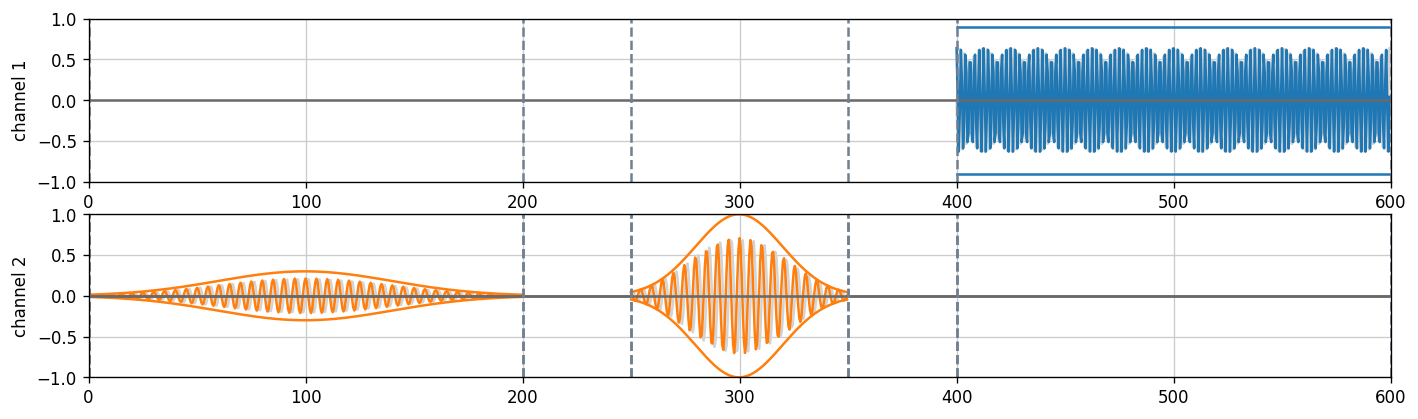

[Qibo 0.1.8|INFO|2022-11-30 13:11:39]: WARNING: The frequency of pulse ReadoutPulse(400, 500, 0.2, 7_520_000_000, 0, Rectangular(), 1, 0) is higher than the nyqusit frequency (1000000000) for the device sampling rate: 2000000000
[Qibo 0.1.8|INFO|2022-11-30 13:11:39]: WARNING: The frequency of pulse ReadoutPulse(400, 500, 0.2, 7_520_000_000, 0, Rectangular(), 1, 0) is higher than the nyqusit frequency (1000000000) for the device sampling rate: 2000000000


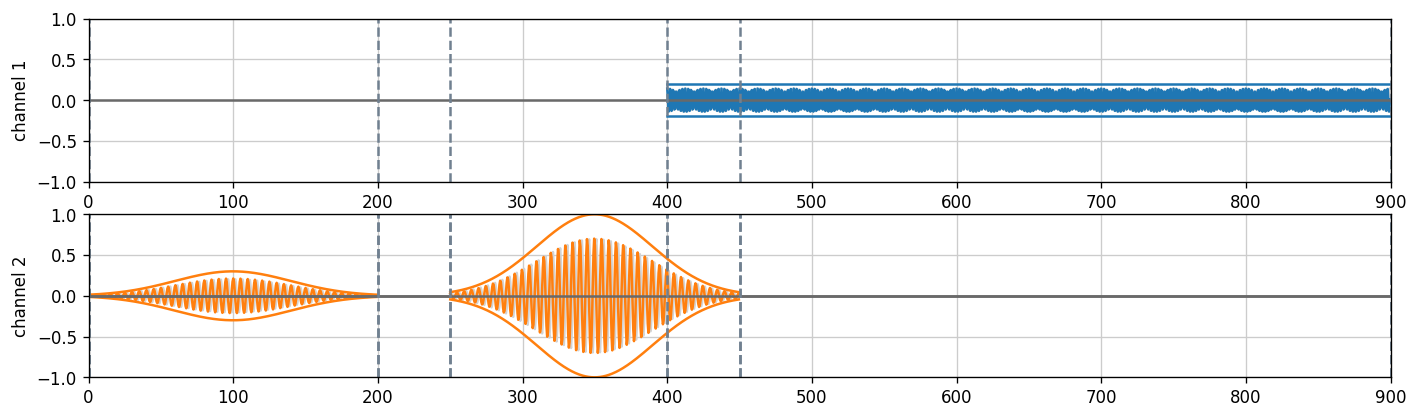

In [9]:
from qibolab.pulses import Pulse, PulseSequence, ReadoutPulse, PulseShape
from qibolab.instruments.zhinst import SHFQC_QA
import laboneq.simple as lo
from qibolab.paths import qibolab_folder

PulseShape.SAMPLING_RATE = 2e9

sequences = []

sequence1 = PulseSequence()

sequence1.add(
    Pulse(
        start=0,
        amplitude=0.3,
        duration=200,
        frequency=200_000_000,
        relative_phase=0,
        shape="Gaussian(5)",  # Gaussian shape with std = duration / int
        channel=2,
        qubit=0,
    )
)

sequence1.add(
    Pulse(
        start=250,
        amplitude=1,
        duration=100,
        frequency=200_000_000,
        relative_phase=0,
        shape="Drag(5, 10)", 
        channel=2,
        qubit=0,
    )
)

sequence1.add(
    ReadoutPulse(
        start=400,
        amplitude=0.9,
        duration=200,
        frequency=7_520_000_000,
        relative_phase=0,
        shape="Rectangular",
        channel=1,
        qubit=0,
    )
)


sequence1.plot()

sequences.append(sequence1)

sequence2 = PulseSequence()

sequence2.add(
    Pulse(
        start=0,
        amplitude=0.3,
        duration=200,
        frequency=200_000_000,
        relative_phase=0,
        shape="Gaussian(5)",  # Gaussian shape with std = duration / int
        channel=2,
        qubit=0,
    )
)

sequence2.add(
    Pulse(
        start=250,
        amplitude=1,
        duration=200,
        frequency=200_000_000,
        relative_phase=0.5,
        shape="Drag(5, 0.1)", 
        channel=2,
        qubit=0,
    )
)

sequence2.add(
    ReadoutPulse(
        start=400,
        amplitude=0.2,
        duration=500,
        frequency=7_520_000_000,
        relative_phase=0,
        shape="Rectangular",
        channel=1,
        qubit=0,
    )
)


sequence2.plot()

sequences.append(sequence2)

In [1]:
from qibolab.pulses import Pulse, PulseSequence, ReadoutPulse, PulseShape
from qibolab.instruments.zhinst import SHFQC_QA
import laboneq.simple as lo
from qibolab.paths import qibolab_folder

# runcard = "/home/admin/Juan/qibolab/src/qibolab/runcards/zhinst.yml"
runcard = qibolab_folder / "runcards" / "zhinst.yml"
use_emulation = False
Device = SHFQC_QA('EL_ZURO', "DEV12146", runcard, use_emulation=use_emulation)

2022.11.30 16:14:14.709 laboneq.controller.laboneq_logging INFO   Logging initialized from [Default inline config in laboneq.controller.laboneq_logging] logdir is /home/admin/Juan/qibolab/examples/laboneq_output/log
2022.11.30 16:14:14.709 laboneq.controller.controller  INFO   VERSION: laboneq 1.3.0
2022.11.30 16:14:14.710 laboneq.controller.controller  INFO   Connecting to data server at localhost:8004
2022.11.30 16:14:14.861 laboneq.controller.communication INFO   Connected to Zurich Instrument's Data Server version 22.08 at localhost:8004


In [2]:
sequence0 = PulseSequence()
sequence1 = PulseSequence()
sequence2 = PulseSequence()

ro0 = Device.create_qubit_readout_pulse(0, 0)

ro1 = Device.create_qubit_readout_pulse(0, 100)

ro2 = Device.create_qubit_readout_pulse(0, 200)

sequence0.add(ro0)
sequence1.add(ro1)
sequence2.add(ro2)

sequences = []
sequences.append(sequence0)
sequences.append(sequence1)
sequences.append(sequence2)

In [3]:
sequence0

PulseSequence
ReadoutPulse(0, 1000, 0.1, 20_000_000, 0, Rectangular(), 0, 0)

In [4]:
sequences

[PulseSequence
 ReadoutPulse(0, 1000, 0.1, 20_000_000, 0, Rectangular(), 0, 0),
 PulseSequence
 ReadoutPulse(100, 1000, 0.1, 20_000_000, 0, Rectangular(), 0, 0),
 PulseSequence
 ReadoutPulse(200, 1000, 0.1, 20_000_000, 0, Rectangular(), 0, 0)]

In [5]:
Device.sequences_to_ZurichPulses(sequences)

In [6]:
Device.sequence_readout

[[PulseFunctional(function='const', uid='readout_0_0', amplitude=0.1, length=1.0000000000000002e-06, pulse_parameters=None)],
 [PulseFunctional(function='const', uid='readout_1_0', amplitude=0.1, length=1.0000000000000002e-06, pulse_parameters=None)],
 [PulseFunctional(function='const', uid='readout_2_0', amplitude=0.1, length=1.0000000000000002e-06, pulse_parameters=None)]]

In [7]:
Device.sequencesPulses_to_exp()

hola


In [8]:
Device.experiment.get_signal_map()

{'measure': '/logical_signal_groups/q0/measure_line',
 'acquire': '/logical_signal_groups/q0/acquire_line'}

In [9]:
Device.run_seq()

2022.11.30 16:14:25.870 laboneq.compiler.workflow.compiler INFO   Starting LabOne Q Compiler run...
2022.11.30 16:14:25.944 laboneq.compiler.workflow.compiler INFO   Total seqC lines generated: 21
2022.11.30 16:14:25.945 laboneq.compiler.workflow.compiler INFO   Total sample points generated: 6000
2022.11.30 16:14:25.945 laboneq.compiler.workflow.compiler INFO   Finished LabOne Q Compiler run.


TypeError: __init__() missing 1 required positional argument: 'length'

In [6]:
Device.sequence_readout

[[PulseFunctional(function='const', uid='readout0', amplitude=0.2, length=5.000000000000001e-07, pulse_parameters=None)],
 [PulseFunctional(function='const', uid='readout0', amplitude=0.9, length=2.0000000000000002e-07, pulse_parameters=None)],
 [PulseFunctional(function='const', uid='readout0', amplitude=0.2, length=5.000000000000001e-07, pulse_parameters=None)]]

In [6]:
Device.results.get_data("sequence0")

LabOneQException: No result for handle: sequence0

In [7]:
Device.results.get_data("sequence1")

LabOneQException: No result for handle: sequence1

In [7]:
Device.results.get_data("sequence2")

(6.850183022697549e-07-4.530055060448624e-05j)

In [5]:
Device.delays

[[-200, 50], [-500, 50]]

In [7]:
Device.rel_phases[0][0]

0.0

In [8]:
for j in range(len(Device.sequence_readout)):
    print(j)

0
1


In [4]:
msr,phase, i , q = Device.execute_pulse_sequences(sequences)
print(msr, phase, i, q)

AttributeError: 'SHFQC_QA' object has no attribute 'execute_pulse_sequences'

In [ ]:
sequence_readout = [[lo.PulseFunctional(function='const', uid='readout0', amplitude=0.2, length=5e-07, pulse_parameters=None)],
                    [lo.PulseFunctional(function='const', uid='readout0', amplitude=0.9, length=2e-07, pulse_parameters=None)],
                    [lo.PulseFunctional(function='const', uid='readout0', amplitude=0.2, length=5e-07, pulse_parameters=None)]]

exp = lo.Experiment(
    uid="Sequence",
    signals=[
        lo.ExperimentSignal("measure"),
        lo.ExperimentSignal("acquire"),
    ],
)

## experimental pulse sequence
# outer loop - real-time, cyclic averaging in standard integration mode
with exp.acquire_loop_rt(
    uid="shots",
    count=self.settings["hardware_avg"], # 10000
    averaging_mode=lo.AveragingMode.SEQUENTIAL,
    acquisition_type=lo.AcquisitionType.SPECTROSCOPY,
):
    # # inner loop - real-time sweep of qubit drive pulse amplitude
    # qubit readout pulse and data acquisition
    for j in range(len(sequence_readout)):
        sequence_r = sequence_readout[j]

        with exp.section(uid="qubit_readout", length= 2e-6):
            exp.play(signal="measure", pulse=sequence_r[0])
            integration_time = self.native_gates["single_qubit"][0]["MZ"]["integration_time"] # 1e-7

            exp.acquire(
                signal="acquire", 
                handle=f"sequence{j}", 
                length=integration_time
            )

        # relax time after readout - for signal processing and qubit relaxation to ground state
        with exp.section(uid="relax"):
            exp.delay(signal="measure", time=self.settings["readout_delay"])
            
self.map_q0 = {
    "measure": self.Zsetup.logical_signal_groups["q0"].logical_signals["measure_line"],
    "acquire": self.Zsetup.logical_signal_groups["q0"].logical_signals["acquire_line"],
}